# K-Nearest Neighbors (KNN) Algorithm

The **K-Nearest Neighbors (KNN)** algorithm is a simple yet powerful supervised machine learning algorithm used for both classification and regression tasks. It works based on the principle of similarity, classifying data points based on their proximity to others in a feature space.

---

## How KNN Works

1. **Data Preparation**:
   - Represent data as points in a multi-dimensional feature space.
   - Normalize or scale data to avoid features with larger ranges dominating the distance calculation.

2. **Define Parameters**:
   - **K (number of neighbors)**: The number of nearest neighbors considered when classifying or predicting a data point.
   - **Distance Metric**: Common choices include:
     - **Euclidean distance**: \( d = \sqrt{\sum (x_i - y_i)^2} \)
     - **Manhattan distance**: \( d = \sum |x_i - y_i| \)
     - **Minkowski distance**: Generalized form, \( d = (\sum |x_i - y_i|^p)^{1/p} \)

3. **Algorithm**:
   - For each new data point:
     1. Compute the distance to all training data points.
     2. Identify the \( K \)-nearest neighbors based on the chosen distance metric.
     3. For classification:
        - Assign the class most frequent among the \( K \) neighbors (majority voting).
     4. For regression:
        - Compute the average (or weighted average) of the values of the \( K \) neighbors.

4. **Make Predictions**:
   - Assign a class or a predicted value to the new data point based on the neighbors.

---

## Advantages

- **Simple to implement**: No explicit training phase, making it computationally inexpensive for small datasets.
- **Flexible**: Can handle multi-class classification and regression.
- **Non-parametric**: Makes no assumptions about the underlying data distribution.

---

## Disadvantages

- **Computationally expensive for large datasets**: Requires computing distances for every query point.
- **Sensitive to irrelevant features**: Irrelevant or redundant features can mislead the distance calculation.
- **Curse of dimensionality**: Performance degrades in high-dimensional spaces due to sparse data distribution.
- **Choosing \( K \)**: A small \( K \) can lead to noise sensitivity, while a large \( K \) may oversimplify and ignore local structure.

---

## Use Cases

- **Classification**:
  - Image recognition
  - Text categorization
  - Medical diagnosis (e.g., disease classification)
- **Regression**:
  - Predicting house prices
  - Estimating continuous values from sensor data

---

## Choosing \( K \)

- Start with \( K = \sqrt{n} \), where \( n \) is the number of training samples.
- Use cross-validation to find the optimal \( K \) value.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE



First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

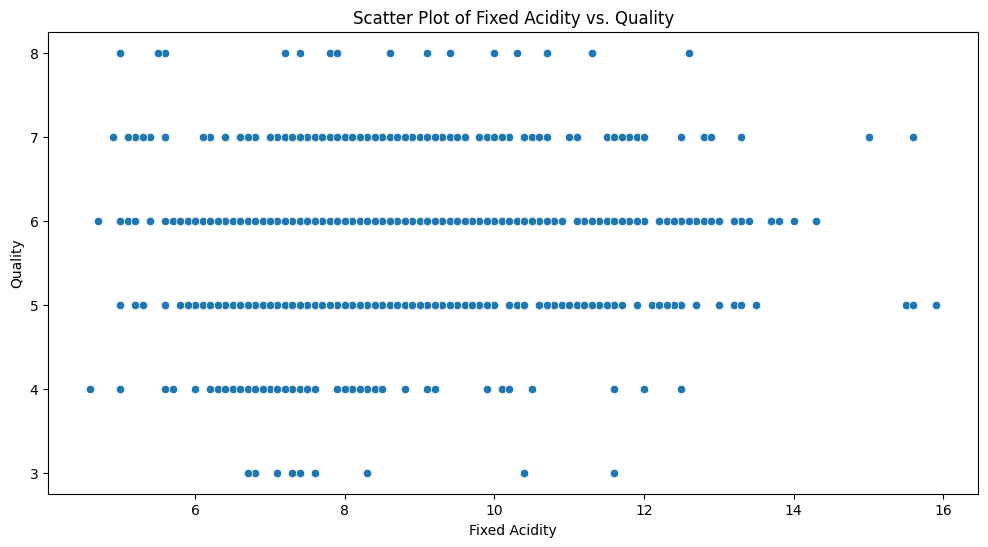

In [8]:

# Load the Wine Quality dataset with correct delimiter
df = pd.read_csv('winequality-red.csv', delimiter=';')

# Explore the data
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

# Visualize the relationship between 'fixed acidity' and 'quality'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fixed acidity', y='quality', data=df)
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.title('Scatter Plot of Fixed Acidity vs. Quality')
plt.show()


c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy on the test set: 0.84

Classification Report:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       136
           4       0.81      0.99      0.89       136
           5       0.72      0.64      0.68       136
           6       0.73      0.47      0.58       137
           7       0.80      0.93      0.86       137
           8       0.93      1.00      0.96       136

    accuracy                           0.84       818
   macro avg       0.83      0.84      0.83       818
weighted avg       0.83      0.84      0.83       818



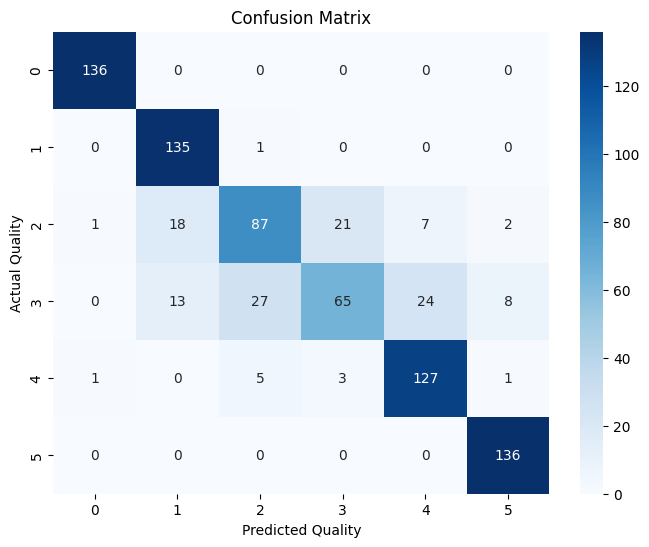

In [9]:
# Prepare the data
X = df.drop('quality', axis=1)
y = df['quality']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train the KNN model with K = 3 for regularization
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix')
plt.show()
